# Requirement
* Generate test case
* time the program
* plot time-input size
* write analysis based on testing results

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
plt.style.use("seaborn")

import subprocess as sub
import time
import os

In [2]:
def sample_gen(sample = "test.txt",N = 5,W = 20, WF = 0.5, HF = 1,SEED = 1215):
    """totally random sample generation"""
    rng = np.random.RandomState(SEED)
    data = np.stack((rng.randint(1,WF*(W+1),N),rng.randint(1,HF*(W+1),N))).T
    if os.path.exists(sample):
        os.remove(sample)
    with open(sample,"w+") as f:
        f.write("{} {}".format(N,W)+'\n')
        f.writelines([" ".join(str(j) for j in i)+"\n" for i in data])

In [3]:
def OutputVis(SEED = 1215):
    """
    Visualization of Output
    """
    fig,ax = plt.subplots()
    fig.set_size_inches(10,10)
    rng = np.random.RandomState(SEED)
    
    with open("output.txt","r") as f:
        hmin  = int(f.readline()) 
        print("Hmin = {:d}".format(hmin))
        data = [[int(j) for j in i.split()] for i in f.readlines()]
        for i in data:
            x,y,w,h = i
            ax.add_patch(pat.Rectangle((x,y),w,h,facecolor = rng.rand(3)))
        
    ax.plot()
    

## 基本检查
可以改变 N 测试不同的情况

Running time = 1848.854065ms
Hmin = 151234


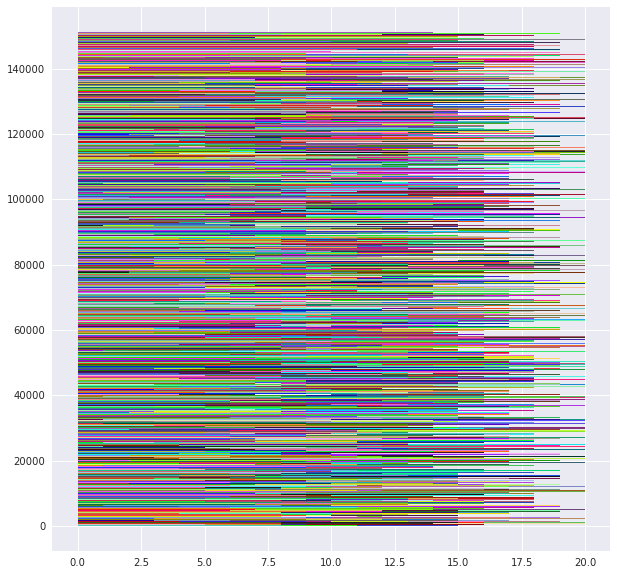

In [4]:
exef,sample = "exchange.exe","test.txt"
sample_gen(sample,N = 10000,WF = 5,HF = 0.5)
_start_time = time.time()
sub.run(["./script.sh","./"+exef,sample])
print("Running time = {:3f}ms".format(1000*(time.time() - _start_time)))
OutputVis()

## 运行时间测试

In [8]:
N,W,WF,HF = 1000,100,0.5, 0.5
exef,sample = "exchange.exe","test.txt"
sample_gen(sample,N,W,WF,HF)
_start_time = time.time()
sub.run(["./script.sh","./"+exef,sample])
print("Running time = {:3f}ms".format(1000*(time.time() - _start_time)))

with open("output.txt","r") as f:
    hmin  = int(f.readline())
    print("Hmin = {:d}".format(hmin))
    

Running time = 165.413380ms
Hmin = 7501


In [27]:
def RunningTime(exef,W=100,WF=1,HF=1):
    N = np.linspace(1,10000,100,dtype="int") 
    data = np.zeros_like(N,dtype="float64")
    sample = "test.txt"
    for i,n in enumerate(N):
        sample_gen(sample,n,W,WF,HF)
        _start_time = time.time()
        sub.run(["./script.sh","./"+exef,sample])
        data[i] = 1000*(time.time() - _start_time)
    return data

In [28]:
exef = "no_exchange.exe"
N = np.linspace(1,10000,100,dtype="int") 
data = RunningTime(exef)

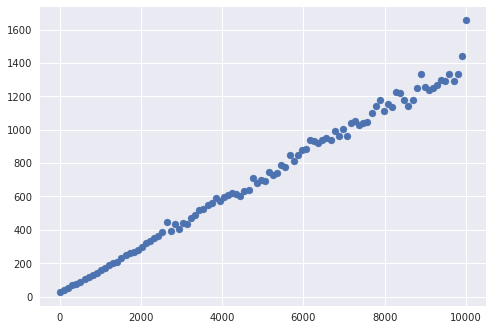

In [29]:
plt.scatter(N,data)

In [31]:
np.savetxt("nex_W_100_WF_HF_1.txt",data,fmt='%.3e')

In [32]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()
X = N[:,None]
y = data
model.fit(X,y)

LinearRegression()

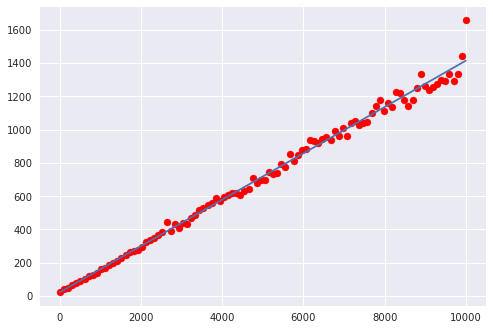

In [51]:
plt.scatter(N,data,c='r')
plt.plot(N,model.predict(N[:,None]))

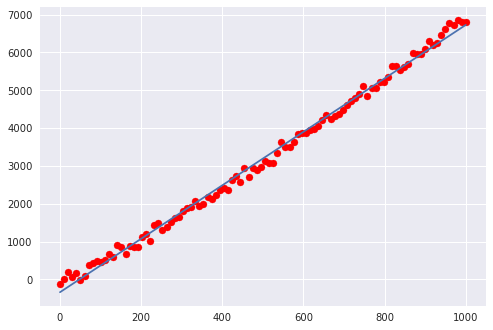

In [56]:
rng = np.random.RandomState(1215)
NUM = 100
x = np.linspace(1,1000,NUM)
y = x*np.log(x) + 100*rng.randn(NUM)
model = LinearRegression()
model.fit(x[:,None],y)
plt.scatter(x,y,c="r")
plt.plot(x,model.predict(x[:,None]))

In [41]:
model = LinearRegression()
X = np.log(N)[10:,None]
y = data/N)
model.fit(X,y)

LinearRegression()

In [45]:
y

array([0.15913933, 0.15172748, 0.15446753, 0.15130399, 0.14789248,
       0.15115738, 0.1540302 , 0.15256999, 0.14745645, 0.14508938,
       0.14613065, 0.15245138, 0.15092893, 0.15097087, 0.15035757,
       0.15304698, 0.17032698, 0.14330818, 0.15355935, 0.1386343 ,
       0.1456017 , 0.13889778, 0.14578127, 0.14665431, 0.15089828,
       0.14918409, 0.1503668 , 0.15022354, 0.15344512, 0.1448106 ,
       0.14719737, 0.14670934, 0.14659939, 0.14189511, 0.13614232,
       0.13926818, 0.13785227, 0.1490913 , 0.13986138, 0.14108918,
       0.13748841, 0.14463419, 0.13906988, 0.13807851, 0.14506907,
       0.13990909, 0.15035353, 0.14063351, 0.14480215, 0.14697133,
       0.14545516, 0.15207995, 0.14854677, 0.14486978, 0.14545108,
       0.14516954, 0.14087173, 0.14655352, 0.13997836, 0.14440162,
       0.13595645, 0.14476123, 0.14443937, 0.13928757, 0.13896122,
       0.1383088 , 0.14339587, 0.14659705, 0.14982857, 0.13923289,
       0.1431406 , 0.1387296 , 0.14775663, 0.14563875, 0.13888